## Load Models and Imports


In [12]:
from ultralytics import YOLO
import time
import os
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np

In [13]:
# read from tflite
model32 = YOLO('best_float32.tflite')
model16 = YOLO('runs\\detect\\train6\\weights\\best_saved_model\\best_float16.tflite')
modelpt = YOLO('runs\\detect\\train\\weights\\best.pt')
model_onnx = YOLO('runs\\detect\\train\\weights\\best.onnx')

WARNING  Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify','pose' or 'obb'.


## Test inference


In [14]:
def draw_ground_truth(image_path, label_path, box_color="red"):
    """
    Draws YOLO bounding boxes on an image.

    Args:
        image_path (str): Path to the image file.
        label_path (str): Path to the YOLO format label file.
        box_color (str): Color of the bounding boxes (default: "red").
    
    Returns:
        PIL.Image: Image with bounding boxes drawn.
    """
    # Load the image
    original_image = Image.open(image_path)
    image_width, image_height = original_image.size

    # Read YOLO label file
    try:
        with open(label_path, "r") as f:
            lines = f.readlines()
    except FileNotFoundError:
        print(f"Warning: No label file found for {image_path}")
        return original_image  # Return image without annotations

    # Draw bounding boxes
    draw = ImageDraw.Draw(original_image)
    for line in lines:
        data = line.strip().split()
        class_id = int(data[0])  # First value is class ID
        x_center, y_center, w, h = map(float, data[1:])  # YOLO format (normalized)

        # Convert YOLO format to pixel coordinates
        x1 = int((x_center - w / 2) * image_width)
        y1 = int((y_center - h / 2) * image_height)
        x2 = int((x_center + w / 2) * image_width)
        y2 = int((y_center + h / 2) * image_height)

        # Draw rectangle (customizable color)
        draw.rectangle([x1, y1, x2, y2], outline=box_color, width=3)

    return original_image

def get_prediction_image(model, image_path):
    """
    Runs model inference on an image and converts the prediction output to a PIL image.

    Args:
        model: Trained object detection model.
        image_path (str): Path to the input image.
    
    Returns:
        PIL.Image: Model's prediction visualization.
    """
    results = model(image_path)
    predicted_array = results[0].plot()  # Get model's prediction visualization
    return Image.fromarray(np.uint8(predicted_array))  # Convert to PIL image

def plot_prediction_image(image_path, model):
    """
    Displays the model's prediction output.

    Args:
        image_path (str): Path to the image file.
        model: Trained object detection model.
    """
    predicted_pil = get_prediction_image(model, image_path)
    plt.imshow(predicted_pil)
    plt.axis("off")
    plt.show()

def plot_ground_truth_vs_prediction(image_path, label_path, model):
    """
    Displays the ground truth vs model prediction side by side.

    Args:
        image_path (str): Path to the image file.
        label_path (str): Path to the YOLO label file.
        model: Trained object detection model.
    """
    # Get ground truth and model prediction images
    gt_image = draw_ground_truth(image_path, label_path)
    predicted_pil = get_prediction_image(model, image_path)

    # Display both images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Ground Truth Image
    axes[0].imshow(gt_image)
    axes[0].set_title("Ground Truth (Red Boxes)")
    axes[0].axis("off")

    # Model Prediction Image
    axes[1].imshow(predicted_pil)
    axes[1].set_title("Model Prediction")
    axes[1].axis("off")

    plt.show()

### Numbers and Characters

In [15]:
# Example usage
image_path = "datasets/images/test/44047.jpg"
label_path = "datasets/labels/test/44047.txt"

plot_ground_truth_vs_prediction(image_path, label_path, model16)

Loading runs\detect\train6\weights\best_saved_model\best_float16.tflite for TensorFlow Lite inference...

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\44047.jpg: 640x640 5 Numbers, 4 Characters, 147.9ms
Speed: 5.9ms preprocess, 147.9ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


### Parcel


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\parcel_339.jpg: 640x640 1 Parcel, 135.2ms
Speed: 6.0ms preprocess, 135.2ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


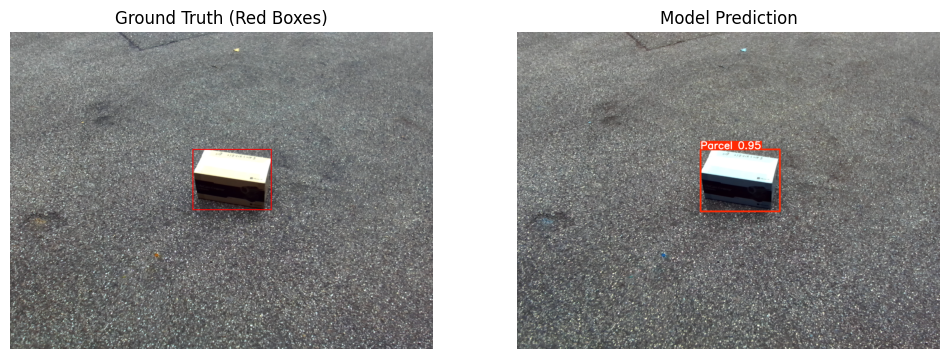

In [16]:
image_path = "datasets/images/test/parcel_339.jpg"
label_path = "datasets/labels/test/parcel_339.txt"

plot_ground_truth_vs_prediction(image_path, label_path, model16)

### Door

This is an image from the door dataset and happens to have a human in it too. The model identifies it but with low confidence. This maybe be indicative of the instances of unlabelled hoomans that happen to be in datasets for other classes.


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\31190.jpg: 640x640 1 Door, 150.3ms
Speed: 6.4ms preprocess, 150.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


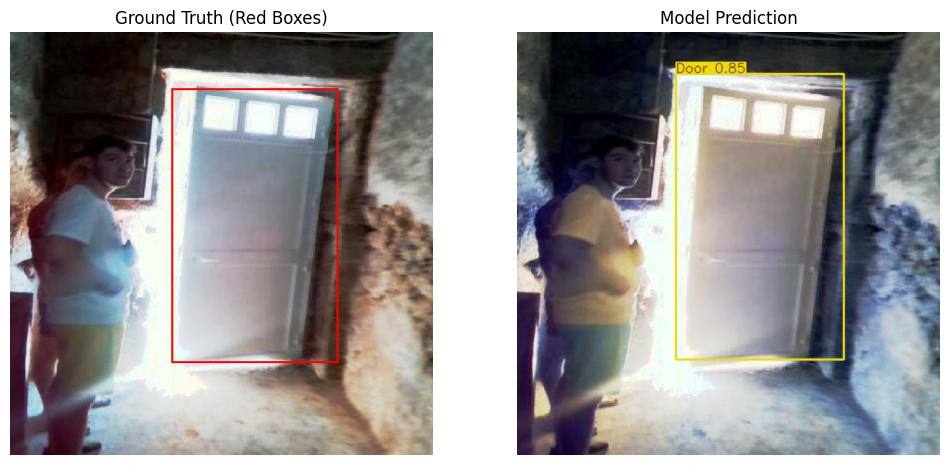

In [17]:
image_path = "datasets/images/test/31190.jpg"
label_path = "datasets/labels/test/31190.txt"

plot_ground_truth_vs_prediction(image_path, label_path, model16)

### Person

People is the class the model performs worst in. This could be due to the earlier reasoning of unlabelled humans and also the human images are the most difficult due to obstructions and partial images etc.


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\20999.jpg: 640x640 1 Person, 105.8ms
Speed: 4.3ms preprocess, 105.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


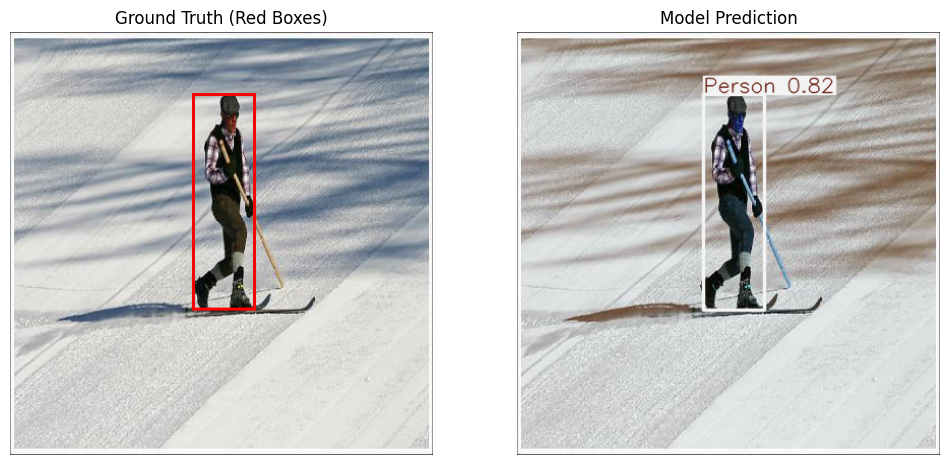

In [18]:
image_path = "datasets/images/test/20999.jpg"
label_path = "datasets/labels/test/20999.txt"

plot_ground_truth_vs_prediction(image_path, label_path, model16)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\24144.jpg: 640x640 2 Persons, 110.0ms
Speed: 4.5ms preprocess, 110.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)


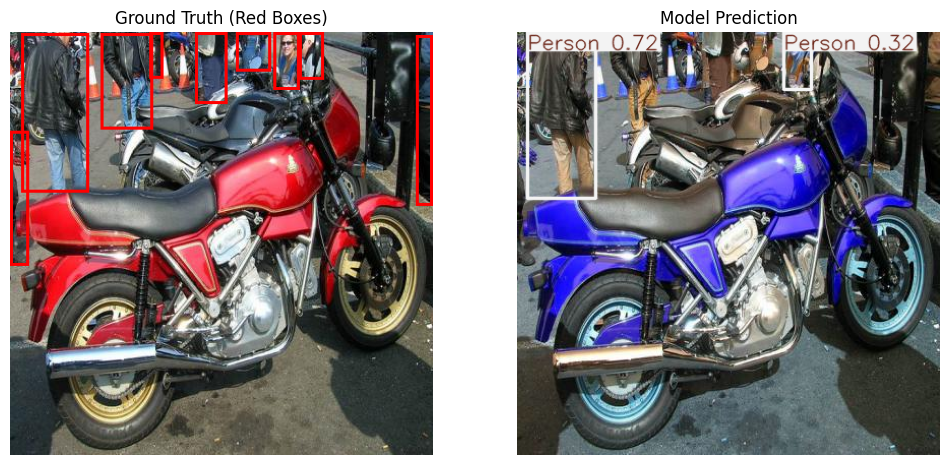

In [19]:
image_path = "datasets/images/test/24144.jpg"
label_path = "datasets/labels/test/24144.txt"

plot_ground_truth_vs_prediction(image_path, label_path, model16)

Loading best_float32.tflite for TensorFlow Lite inference...

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\test_images\test_num2.png: 640x640 1 Parcel, 100.7ms
Speed: 4.2ms preprocess, 100.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


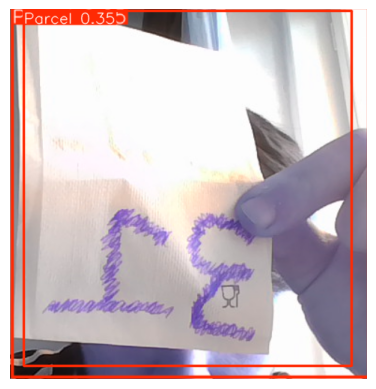

In [20]:
plot_prediction_image("test_images//test_num2.png", model32)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\test_images\test_num.png: 640x640 3 Parcels, 115.4ms
Speed: 3.6ms preprocess, 115.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


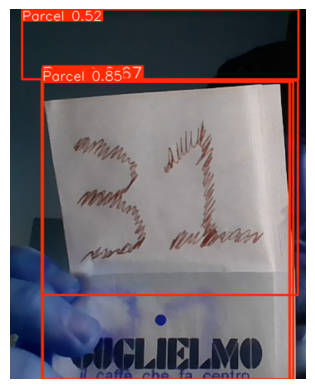

In [21]:
plot_prediction_image("test_images//test_num.png", model32)

Loading runs\detect\train\weights\best.onnx for ONNX Runtime inference...
Using ONNX Runtime CPUExecutionProvider

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\test_images\image (1).png: 640x640 (no detections), 124.4ms
Speed: 14.5ms preprocess, 124.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


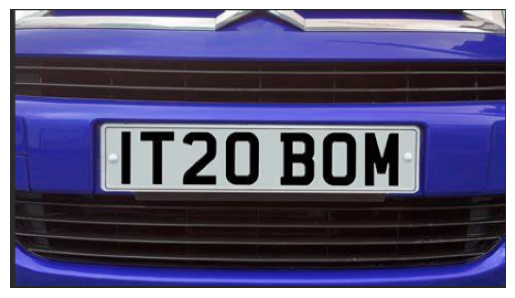

In [22]:
plot_prediction_image("test_images//image (1).png", model_onnx)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\test_images\just_num_camera.jpg: 640x640 (no detections), 117.7ms
Speed: 3.0ms preprocess, 117.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


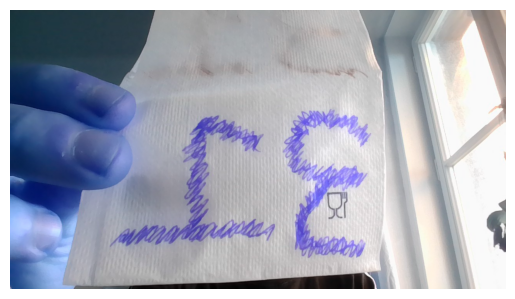

In [23]:
plot_prediction_image("test_images//just_num_camera.jpg", model32)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\test_images\person_and_num_camera_roll.jpg: 640x640 (no detections), 116.8ms
Speed: 6.6ms preprocess, 116.8ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


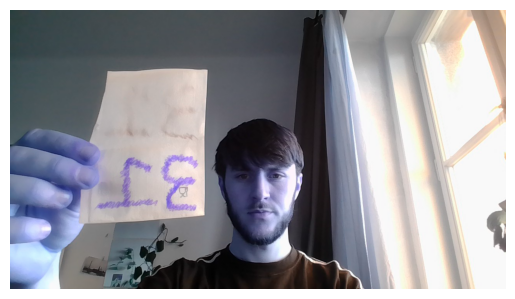

In [24]:
plot_prediction_image("test_images//person_and_num_camera_roll.jpg", model32)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\43460.jpg: 640x640 5 Numbers, 3 Characters, 131.6ms
Speed: 8.5ms preprocess, 131.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


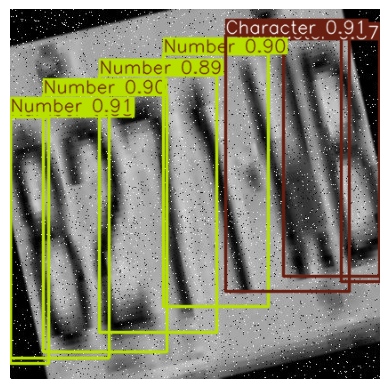

In [25]:
plot_prediction_image("datasets\\images\\test\\43460.jpg", model16)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\test_images\just_num_camera2.jpg: 640x640 1 Parcel, 198.9ms
Speed: 8.9ms preprocess, 198.9ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 640)


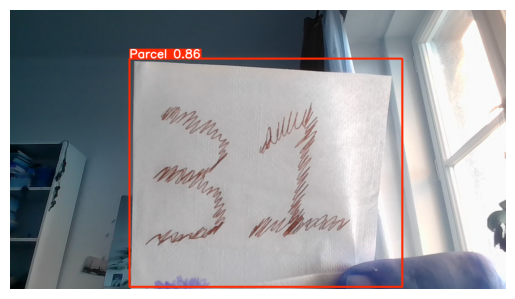

In [26]:
plot_prediction_image("test_images//just_num_camera2.jpg", model32)

## Inference time on image

In [35]:
def inference_image(model, image_path):
    # Measure inference time
    start_time = time.time()
    results = model(image_path)  # Run inference
    end_time = time.time()

    # Calculate FPS (1 / time per inference)
    inference_time = end_time - start_time
    fps = 1 / inference_time
    
    return inference_time, fps


# only pt can take list of images
def batch_inference(model, images):
    # Measure inference time
    start_time = time.time()
    results = model(images)  # Run inference
    end_time = time.time()

    # Calculate FPS (1 / time per inference)
    inference_time = end_time - start_time
    fps = 1 / inference_time
    
    return inference_time, fps

In [36]:
# Create an empty list to store results
results = []

# Iterate over test images
for img_path in os.listdir("datasets/images/test")[:20]:
    full_img_path = os.path.join("datasets/images/test", img_path)

    # Inference with model32
    inf_time, fps = inference_image(model32, full_img_path)
    results.append({
        "image": img_path,
        "model": "model32",
        "inference_time": inf_time,
        "fps": fps
    })

    # Inference with model16
    inf_time, fps = inference_image(model16, full_img_path)
    results.append({
        "image": img_path,
        "model": "model16",
        "inference_time": inf_time,
        "fps": fps
    })

    # Inference with modelpt
    inf_time, fps = inference_image(modelpt, full_img_path)
    results.append({
        "image": img_path,
        "model": "modelpt",
        "inference_time": inf_time,
        "fps": fps
    })

    # Inference with model_onnx
    inf_time, fps = inference_image(model_onnx, full_img_path)
    results.append({
        "image": img_path,
        "model": "model_onnx",
        "inference_time": inf_time,
        "fps": fps
    })

# Convert the results list to a pandas DataFrame
df = pd.DataFrame(results)

# Calculate the average inference time and FPS for each model
average_stats = df.groupby('model').agg(
    average_inference_time=('inference_time', 'mean'),
    average_fps=('fps', 'mean')
).reset_index()

# Print the DataFrame with the average results
print(average_stats)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\10007.jpg: 640x640 1 Parcel, 104.2ms
Speed: 12.0ms preprocess, 104.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Inference Time: 0.1186 seconds
FPS: 8.43

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\10007.jpg: 640x640 1 Parcel, 152.1ms
Speed: 0.0ms preprocess, 152.1ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)
Inference Time: 0.1569 seconds
FPS: 6.37

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\10007.jpg: 416x640 1 Parcel, 68.1ms
Speed: 0.0ms preprocess, 68.1ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 640)
Inference Time: 0.0717 seconds
FPS: 13.95

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\10007.jpg: 640x640 1 Parcel, 125.4ms
Speed: 0.0ms preprocess, 125.4ms inference, 0.0ms postprocess per image at 

## Webcam Test

In [29]:
# run on webcam
model32(0, show=True)


1/1: 0... Success  (inf frames of shape 640x480 at 30.00 FPS)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

0: 640x640 1 Person, 475.7ms
0: 640x640 1 Person, 144.8ms
0: 640x640 1 Person, 113.6ms
0: 640x640 1 Person, 154.2ms
0: 640x640 1 Person, 226.3ms
0: 640x640 1 Person, 235.3ms
0: 640x640 1 Person, 155.2ms
0: 640x640 1 Person, 126.7ms
0: 640x640 1 Person, 222.0ms
0: 640x640 1 Person, 497.2ms
0: 640x640 1 Person, 168.2ms
0: 640x640 1 Person, 253.9ms
0: 640x640 1 Person, 185.1ms
0: 640x640 1 Perso

KeyboardInterrupt: 

## YOLO Variant Comparions

Now I compare the smallest variant of each pretrained YOLO model to see the inference speed.

In [31]:
modelv5n = YOLO('yolov5nu.pt')
model5n6u = YOLO('yolov5n6u.pt')
model8n = YOLO('yolov8n.pt')
model9t = YOLO('yolov9t.pt')
model10n = YOLO('yolov10n.pt')
model11n = YOLO('yolo11n.pt')
model11n_pretained_16tflite = YOLO('runs\\detect\\train6\\weights\\best_saved_model\\best_float16.tflite')

In [36]:
test_img_path = "datasets/images/test/31190.jpg"

inference_image(modelv5n, test_img_path)
inference_image(model5n6u, test_img_path)
inference_image(model8n, test_img_path)
inference_image(model9t, test_img_path)
inference_image(model10n, test_img_path)
inference_image(model11n, test_img_path)
inference_image(model32, test_img_path)
inference_image(model16, test_img_path)


image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\31190.jpg: 640x640 1 person, 372.5ms
Speed: 8.6ms preprocess, 372.5ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\31190.jpg: 1280x1280 1 person, 1 refrigerator, 826.1ms
Speed: 182.4ms preprocess, 826.1ms inference, 8.7ms postprocess per image at shape (1, 3, 1280, 1280)

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\31190.jpg: 640x640 1 person, 1 refrigerator, 223.2ms
Speed: 8.6ms preprocess, 223.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\BenJordan\Documents\Git\object-detection-YOLOv11\datasets\images\test\31190.jpg: 640x640 1 person, 1 refrigerator, 316.5ms
Speed: 6.2ms preprocess, 316.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\BenJordan\Documents\Git\ob

(0.1614365577697754, 6.194383811293224)

In [ ]:
# Create an empty list to store results
results = []

# Iterate over test images
test_files = os.listdir("datasets/images/test")
# shuffle
random.shuffle(test_files)
for img_path in test_files[:250]:
    full_img_path = os.path.join("datasets/images/test", img_path)

    # Inference with model32
    inf_time, fps = inference_image(model32, full_img_path)
    results.append({
        "image": img_path,
        "model": "model pretrain 11",
        "inference_time": inf_time,
        "fps": fps
    })

    # Inference with model16
    inf_time, fps = inference_image(modelv5n, full_img_path)
    results.append({
        "image": img_path,
        "model": "model 5 Nano",
        "inference_time": inf_time,
        "fps": fps
    })

    # Inference with modelpt
    inf_time, fps = inference_image(model5n6u, full_img_path)
    results.append({
        "image": img_path,
        "model": "model 5n 6u",
        "inference_time": inf_time,
        "fps": fps
    })

    # Inference with model_onnx
    inf_time, fps = inference_image(model8n, full_img_path)
    results.append({
        "image": img_path,
        "model": "model 8 nano",
        "inference_time": inf_time,
        "fps": fps
    })

    # inf model 9t
    inf_time, fps = inference_image(model9t, full_img_path)
    results.append({
        "image": img_path,
        "model": "model 9 tiny",
        "inference_time": inf_time,
        "fps": fps
    })

    # inf model 10n
    inf_time, fps = inference_image(model10n, full_img_path)
    results.append({
        "image": img_path,
        "model": "model 10 nano",
        "inference_time": inf_time,
        "fps": fps
    })

    # inf model 11n 
    inf_time, fps = inference_image(model11n, full_img_path)
    results.append({
        "image": img_path,
        "model": "model 11 nano",
        "inference_time": inf_time,
        "fps": fps
    })

    # model11n_pretained_16tflite
    inf_time, fps = inference_image(model11n_pretained_16tflite, full_img_path)
    results.append({
        "image": img_path,
        "model": "model 11 pretrained 16 tflite",
        "inference_time": inf_time,
        "fps": fps
    })

# Convert the results list to a pandas DataFrame
df = pd.DataFrame(results)

# Calculate the average inference time and FPS for each model
average_stats = df.groupby('model').agg(
    average_inference_time=('inference_time', 'mean'),
    average_fps=('fps', 'mean')
).reset_index()

average_stats